# **IMPORTING REQUIRED LIBRARIES**

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from sklearn.metrics import classification_report, confusion_matrix
import cufflinks as cf
from matplotlib.pyplot import figure
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
cf.go_offline(connected=True)
init_notebook_mode(connected=True)

# **PREPROCESSING AND NORMALIZING DATA**

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [3]:
#importing data from CSV file into pandas dataframe
df = pd.read_csv("F:/Sem1/CS513/Final project/CreditFraud/application_data.csv")
df.drop('SK_ID_CURR',axis = 1, inplace = True)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [4]:
#Checking the distribution of target variable
defaulters=df[df.TARGET==1]
nondefaulters=df[df.TARGET==0]
print(len(defaulters))
print(len(nondefaulters))

24825
282686


In [5]:
#checking percentage of defaulters
percentage_defaulters=(len(defaulters)*100)/len(df)
percentage_defaulters

8.072881945686495

In [6]:
#checking percentage of non-defaulters
percentage_nondefaulters=(len(nondefaulters)*100)/len(df)
percentage_nondefaulters

91.92711805431351

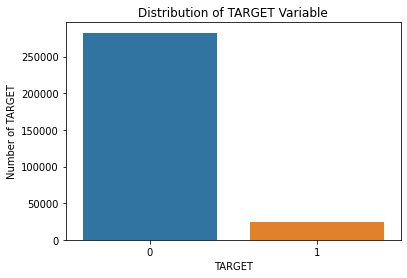

In [7]:
sns.countplot(df.TARGET)
plt.xlabel("TARGET")
plt.ylabel("Number of TARGET")
plt.title("Distribution of TARGET Variable")
plt.show()

In [8]:
# sns.pairplot(df, hue = 'TARGET')

<AxesSubplot:title={'center':'Correlation Matrix'}>

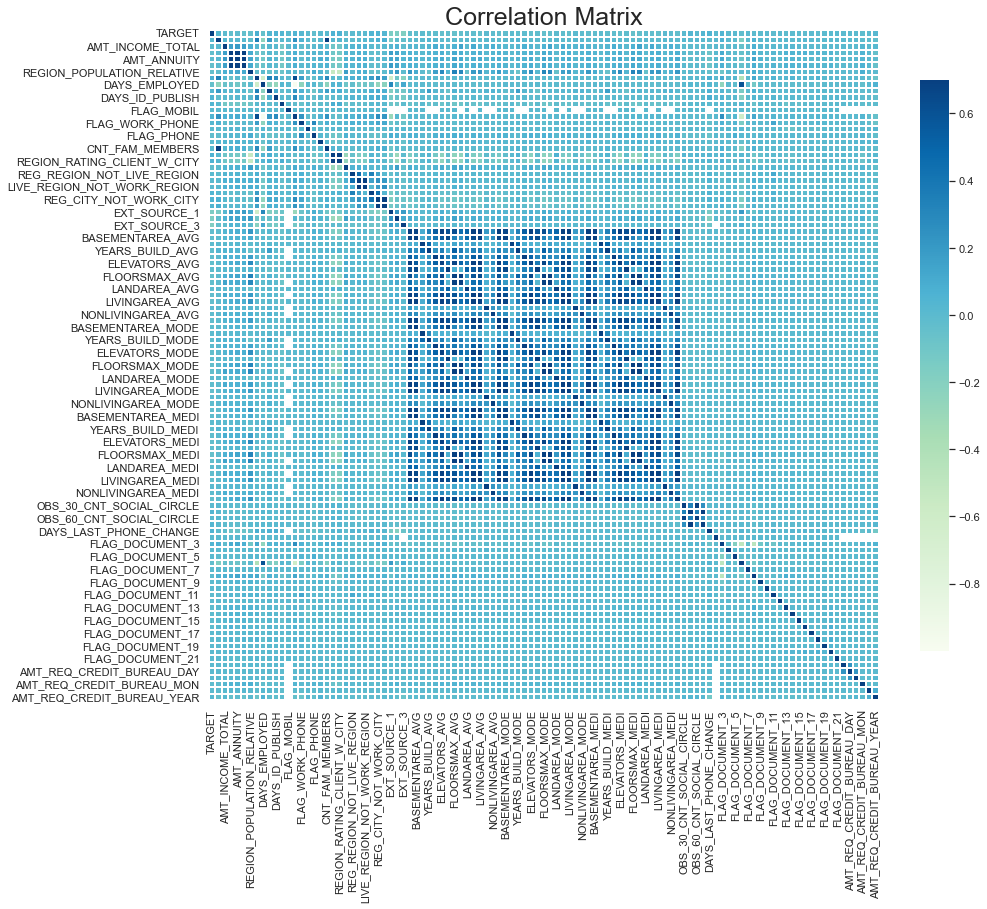

In [9]:
#correlation matrix to see on which columns TARGET is most dependent
sns.set(style="whitegrid", font_scale=1)
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix',fontsize=25)
sns.heatmap(df.corr(),linewidths=0.25,vmax=0.7,square=True,cmap="GnBu",linecolor='w',
            annot=False, cbar_kws={"shrink": .7})

In [10]:
#We are finding linear correlation between all the attributes
#reducing attributes which has correlation more than 0.95
x = df.drop('TARGET', axis = 1)
y = df['TARGET']
corr_matrix = df.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
x = x.drop(to_drop, axis = 1)
upper

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
TARGET,NaN,0.019187,0.003982,0.030369,0.012817,0.039645,0.037227,0.078239,0.044932,0.041975,0.051457,0.037612,0.000534,0.045982,0.028524,0.000370,0.023806,0.001758,0.009308,0.058899,0.060893,0.024166,0.005576,0.006942,0.002819,0.044395,0.050994,0.032518,0.155317,0.160472,0.178919,0.029498,0.022746,0.009728,0.022149,0.018550,0.034199,0.019172,0.044003,0.033614,0.010885,0.025031,0.032997,0.003176,0.013578,0.027284,0.019952,0.009036,0.022068,0.016340,0.032131,0.017387,0.043226,0.032698,0.010174,0.023393,0.030685,0.001557,0.012711,0.029184,0.022081,0.009993,0.022326,0.018573,0.033863,0.019025,0.043768,0.033394,0.011256,0.024621,0.032739,0.002757,0.013337,0.032596,0.009131,0.032248,0.009022,0.031276,0.055218,0.005417,0.044346,0.002672,0.000316,0.028602,0.001520,0.008040,0.004352,0.001414,0.004229,0.000756,0.011583,0.009464,0.006536,0.011615,0.003378,0.007952,0.001358,0.000215,0.003709,0.000930,0.002704,0.000788,0.012462,0.002022,0.019930
CNT_CHILDREN,NaN,NaN,0.012882,0.002145,0.021374,0.001827,0.025573,0.330938,0.239818,0.183395,0.028019,0.008494,0.001041,0.240714,0.055630,0.000794,0.029906,0.022619,0.879161,0.025423,0.024781,0.007292,0.013319,0.008185,0.014835,0.020072,0.070650,0.069957,0.138470,0.018015,0.042710,0.013222,0.008464,0.006902,0.030172,0.000140,0.007060,0.008341,0.009705,0.008753,0.003121,0.008648,0.010116,0.004051,0.000028,0.012105,0.008513,0.006199,0.029549,0.000440,0.006397,0.006880,0.009550,0.008044,0.002212,0.007955,0.009517,0.004077,0.000231,0.012985,0.008799,0.006401,0.030124,0.000609,0.006747,0.008325,0.009447,0.008231,0.002820,0.007962,0.010067,0.004133,0.000061,0.008037,0.015593,0.001262,0.015232,0.001861,0.005865,0.001786,0.056837,0.003709,0.016737,0.157024,0.001498,0.051697,0.001997,0.002756,0.005318,0.000293,0.003945,0.005459,0.003609,0.010662,0.000773,0.004031,0.000864,0.000988,0.002450,0.000410,0.000366,0.002436,0.010808,0.007836,0.041550
AMT_INCOME_TOTAL,NaN,NaN,NaN,0.156870,0.191657,0.159610,0.074796,0.027261,0.064223,0.027805,0.008506,0.117273,0.000325,0.063994,0.017193,0.008290,0.000159,0.038378,0.016342,0.085465,0.091735,0.03645

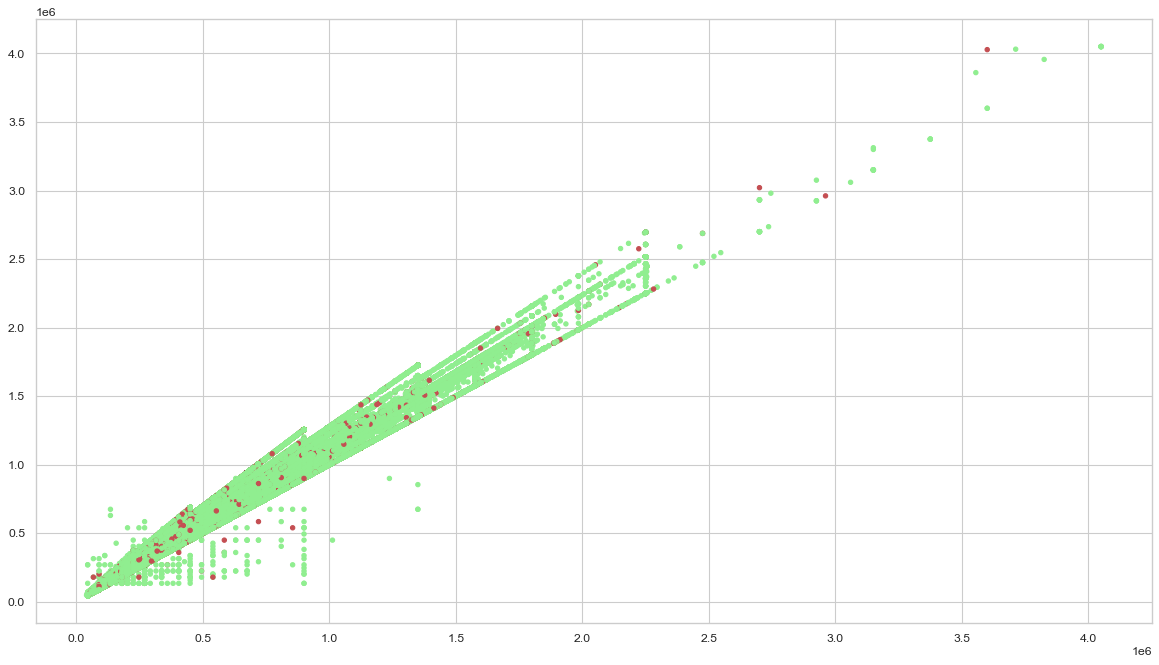

In [11]:
figure(figsize=(18, 10), dpi=80)
colormap = np.array(['lightgreen', 'r', 'b'])
plt.scatter(df['AMT_GOODS_PRICE'],df['AMT_CREDIT'], c=colormap[df['TARGET']] , s = 15)

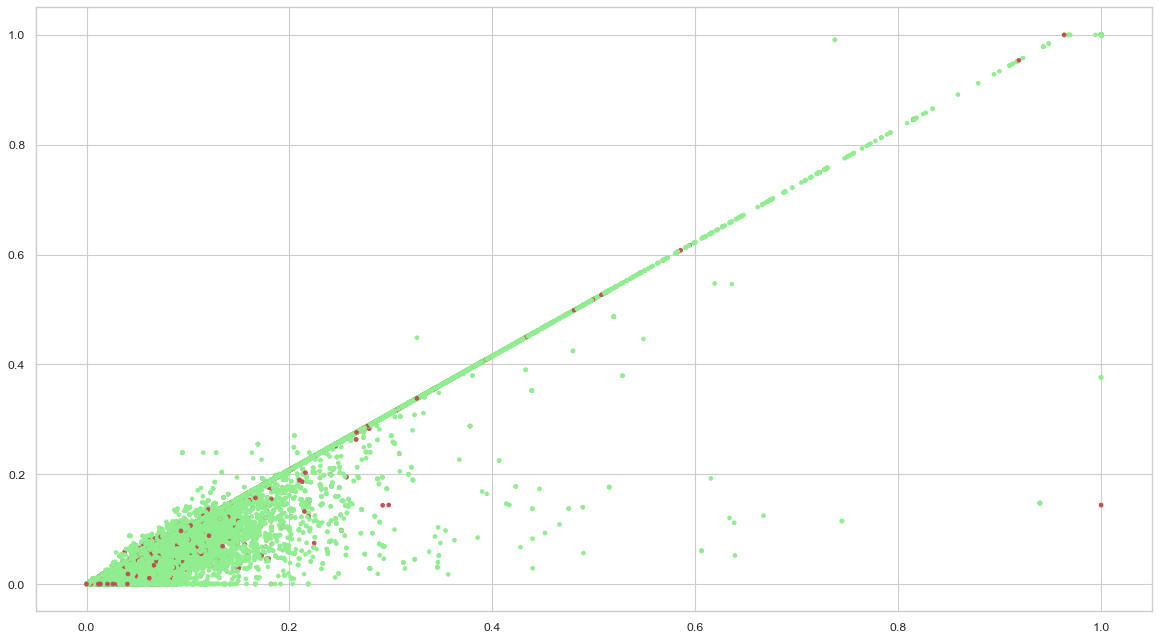

In [12]:
figure(figsize=(18, 10), dpi=80)
colormap = np.array(['lightgreen', 'r', 'b'])
plt.scatter(df['BASEMENTAREA_AVG'],df['BASEMENTAREA_MODE'], c=colormap[df['TARGET']] , s = 10)

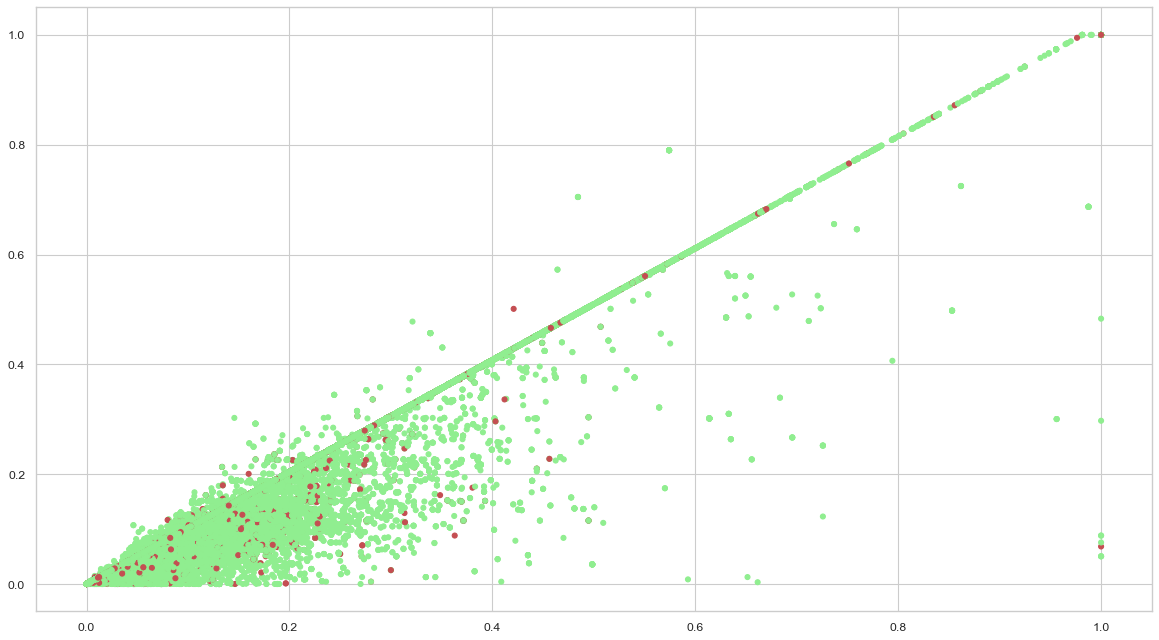

In [13]:
figure(figsize=(18, 10), dpi=80)
colormap = np.array(['lightgreen', 'r', 'b'])
plt.scatter(df['APARTMENTS_AVG'],df['APARTMENTS_MODE'], c=colormap[df['TARGET']] , s = 20)

<AxesSubplot:>

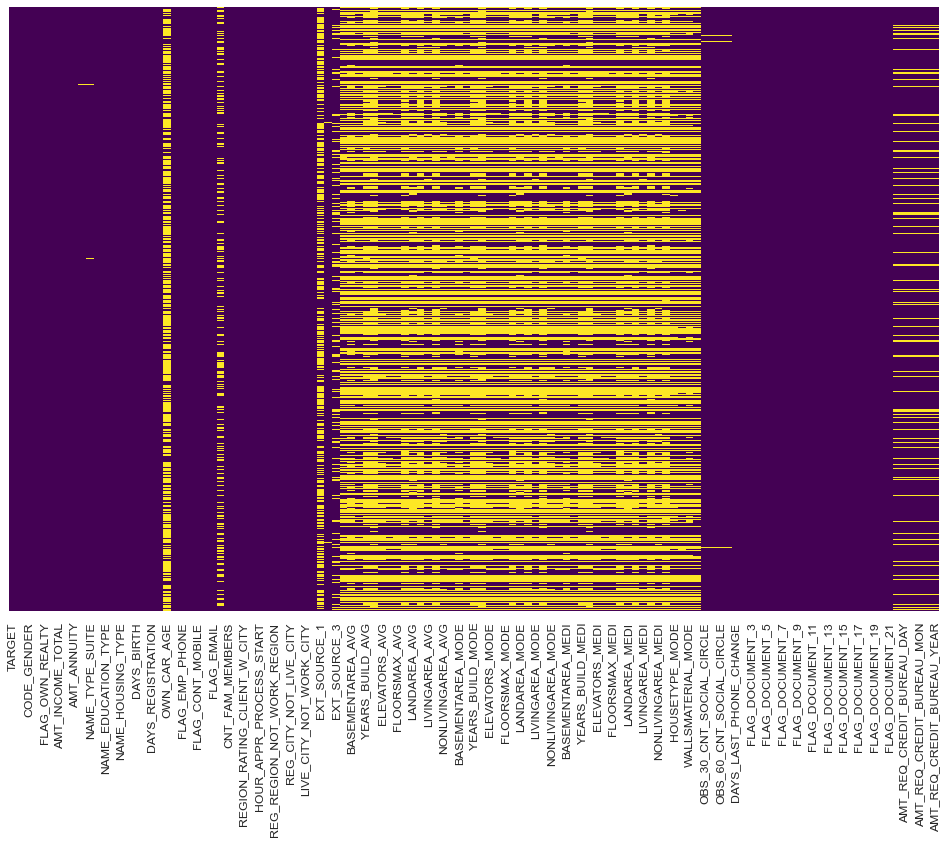

In [14]:
#checking whether dataset contains any null or NaN values 
figure(figsize=(15, 10), dpi=80)
sns.heatmap(df.isnull(),yticklabels = False, cbar = False, cmap = 'viridis')

In [15]:
#Percentage of null values in each column
col_with_nullvalues=x.isnull().sum()/len(x)*100
col_with_nullvalues.sort_values(ascending=False)

COMMONAREA_AVG                 69.872297
NONLIVINGAPARTMENTS_AVG        69.432963
FONDKAPREMONT_MODE             68.386172
LIVINGAPARTMENTS_AVG           68.354953
FLOORSMIN_AVG                  67.848630
YEARS_BUILD_AVG                66.497784
OWN_CAR_AGE                    65.990810
LANDAREA_AVG                   59.376738
BASEMENTAREA_AVG               58.515956
EXT_SOURCE_1                   56.381073
NONLIVINGAREA_AVG              55.179164
ELEVATORS_AVG                  53.295980
WALLSMATERIAL_MODE             50.840783
APARTMENTS_AVG                 50.749729
ENTRANCES_AVG                  50.348768
LIVINGAREA_AVG                 50.193326
HOUSETYPE_MODE                 50.176091
FLOORSMAX_AVG                  49.760822
YEARS_BEGINEXPLUATATION_AVG    48.781019
TOTALAREA_MODE                 48.268517
EMERGENCYSTATE_MODE            47.398304
OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_B

In [16]:
#removing columns which includes more than 60% NaN values
nullvalues_60=col_with_nullvalues[col_with_nullvalues.values>60.0].sort_values(ascending=False)
nullvalues_60.keys()

Index(['COMMONAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE',
       'LIVINGAPARTMENTS_AVG', 'FLOORSMIN_AVG', 'YEARS_BUILD_AVG',
       'OWN_CAR_AGE'],
      dtype='object')

In [17]:
x = x.drop(nullvalues_60.keys(), axis = 1)

In [18]:
x.shape

(307511, 81)

In [19]:
# Checking the columns having less null percentage
x.isnull().sum()/len(df)*100

NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
NAME_TYPE_SUITE                 0.420148
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE                0.000000
FLAG_PHONE                      0.000000
FLAG_EMAIL                      0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS 

In [20]:
#these are the columns which are needed to be factorized
objCol = x.select_dtypes('object').columns
objCol

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [21]:
#factorizing columns which have type of Object
#changing Object type columns into float and int
for col in objCol:
    x[col], uniques_col = pd.factorize(x[col])
objCol = x.select_dtypes('object').columns
objCol

Index([], dtype='object')

In [22]:
x.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,0,0,0,202500.0,406597.5,24700.5,0,0,0,0,0,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,0,1.0,2,0,10,0,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0,0.0149,0,0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,1,0,1,0,270000.0,1293502.5,35698.5,1,1,1,1,0,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,1,2.0,1,1,11,0,0,0,0,0,0,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0,0.0714,1,0,1.0,0.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,1,0,0,67500.0,135000.0,6750.0,0,0,0,0,0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,0,1.0,2,1,9,0,0,0,0,0,0,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,-1,-1,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,1,0,0,0,135000.0,312682.5,29686.5,0,0,0,2,0,0.008019,-19005,-3039,-9833.0,-2437,1,0,1,0,0,0,2.0,2,0,17,0,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,-1,-1,2.0,0.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,0,121500.0,513000.0,21865.5,0,0,0,0,0,0.028663,-19932,-3038,-4311.0,-3458,1,0,1,0,0,1,1.0,2,2,11,0,0,0,0,1,1,3,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,-1,-1,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df = pd.concat([y, x], axis = 1)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,0,0,0,0,202500.0,406597.5,24700.5,0,0,0,0,0,0.018801,-9461,-637,-3648.0,-2120,1,0,1,1,0,0,1.0,2,0,10,0,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0,0.0149,0,0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,1,0,1,0,270000.0,1293502.5,35698.5,1,1,1,1,0,0.003541,-16765,-1188,-1186.0,-291,1,0,1,1,0,1,2.0,1,1,11,0,0,0,0,0,0,1,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0,0.0714,1,0,1.0,0.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,1,0,0,67500.0,135000.0,6750.0,0,0,0,0,0,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,0,0,1.0,2,1,9,0,0,0,0,0,0,2,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,-1,-1,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0,0,0,135000.0,312682.5,29686.5,0,0,0,2,0,0.008019,-19005,-3039,-9833.0,-2437,1,0,1,0,0,0,2.0,2,0,17,0,0,0,0,0,0,0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,-1,-1,2.0,0.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,0,0,0,0,0,121500.0,513000.0,21865.5,0,0,0,0,0,0.028663,-19932,-3038,-4311.0,-3458,1,0,1,0,0,1,1.0,2,2,11,0,0,0,0,1,1,3,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-1,NaN,-1,-1,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
#if there is any negetive values we are changing it to abosolute
neg_values = df.columns[(df < 0).any()].tolist()
for col in neg_values:
    df[col] = abs(df[col])

In [25]:
#replacing NaN values with the median of corresponding columns
columns_with_nan = df.columns[df.isna().any()].tolist()
columns_with_nan
for col in columns_with_nan:
    df[col] = df[col].replace(np.NaN,df[col].median())

In [26]:
columns_with_nan = df.columns[df.isna().any()].tolist()
columns_with_nan

[]

In [27]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,0,0,0,0,202500.0,406597.5,24700.5,0,0,0,0,0,0.018801,9461,637,3648.0,2120,1,0,1,1,0,0,1.0,2,0,10,0,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.00,0.0690,0.0833,0.0369,0.0190,0.0000,0,0.0149,0,0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,1,0,1,0,270000.0,1293502.5,35698.5,1,1,1,1,0,0.003541,16765,1188,1186.0,291,1,0,1,1,0,1,2.0,1,1,11,0,0,0,0,0,0,1,0.311267,0.622246,0.535276,0.0959,0.0529,0.9851,0.08,0.0345,0.2917,0.0130,0.0549,0.0098,0,0.0714,1,0,1.0,0.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,0,1,0,0,67500.0,135000.0,6750.0,0,0,0,0,0,0.010032,19046,225,4260.0,2531,1,1,1,1,0,0,1.0,2,1,9,0,0,0,0,0,0,2,0.505998,0.555912,0.729567,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,1,0.0688,1,1,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,1,0,0,0,135000.0,312682.5,29686.5,0,0,0,2,0,0.008019,19005,3039,9833.0,2437,1,0,1,0,0,0,2.0,2,0,17,0,0,0,0,0,0,0,0.505998,0.650442,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,1,0.0688,1,1,2.0,0.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,0,0,0,0,121500.0,513000.0,21865.5,0,0,0,0,0,0.028663,19932,3038,4311.0,3458,1,0,1,0,0,1,1.0,2,2,11,0,0,0,0,1,1,3,0.505998,0.322738,0.535276,0.0876,0.0763,0.9816,0.00,0.1379,0.1667,0.0481,0.0745,0.0036,1,0.0688,1,1,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
#standardizing and normalizing dataset using StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET',axis = 1))
scaled_features = scaler.transform(df.drop('TARGET', axis = 1))
scaled_features

array([[-0.32439532, -1.38813546, -0.71791354, ..., -0.26994654,
        -0.30861959, -0.44092567],
       [-0.32439532,  0.72030748, -0.71791354, ..., -0.26994654,
        -0.30861959, -1.00733095],
       [ 3.08265852, -1.38813546,  1.39292539, ..., -0.26994654,
        -0.30861959, -1.00733095],
       ...,
       [-0.32439532,  0.72030748, -0.71791354, ...,  0.89717516,
        -0.30861959, -0.44092567],
       [-0.32439532,  0.72030748, -0.71791354, ..., -0.26994654,
        -0.30861959, -1.00733095],
       [-0.32439532,  0.72030748, -0.71791354, ...,  2.06429685,
        -0.30861959, -0.44092567]])

In [29]:
df_feat = pd.DataFrame(scaled_features, columns= df.columns[:-1])

In [30]:
df_feat.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,LANDAREA_AVG,LIVINGAREA_AVG,NONLIVINGAREA_AVG,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT
0,-0.324395,-1.388135,-0.717914,-0.664531,-0.577538,0.142129,-0.478095,-0.166143,-0.397561,-0.889689,-0.570906,-1.26454,-0.329911,-0.149452,-1.506880,-0.481110,-0.379837,-0.579154,0.001803,-0.499013,0.043245,1.599337,-0.245215,-0.860379,-1.265722,-0.103064,-1.368578,-0.631821,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.880189,-3.021877,-1.317940,-2.153651,-1.002379,-0.831647,-0.174890,-0.368513,-1.056903,-1.061562,-0.354333,-0.901454,-0.305255,-1.011836,-0.902008,-1.233160,-0.963763,0.242861,4.163504,5.253260,0.206992,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-0.440926
1,-0.324395,0.720307,-0.717914,1.504820,-0.577538,0.426792,1.725450,0.592683,0.992925,-0.063874,1.061891,-0.25013,-0.329911,-1.252750,0.166821,-0.477159,-1.078697,-1.790855,0.001803,-0.499013,0.043245,1.599337,-0.245215,-0.564453,-0.167638,-2.067573,-0.906581,-0.325620,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.787990,-1.384737,0.564482,0.112063,-0.082629,-0.532205,0.129151,0.431106,-1.544566,0.890461,-0.809463,-0.451266,-0.101705,-1.011836,-0.187810,-0.133391,-0.963763,-0.174085,-0.320480,-0.275663,-0.163107,-0.006502,0.639065,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331
2,3.082659,-1.388135,1.392925,-0.664531,-0.577538,-0.427196,-1.152888,-1.404669,-0.397561,-0.889689,-0.570906,-1.26454,-0.329911,-0.783451,0.689509,-0.484065,-0.206116,-0.306869,0.001803,2.003956,0.043245,1.599337,-0.245215,-0.860379,-1.265722,-0.103064,-0.906581,-0.938022,-0.124004,-0.231267,-0.205869,-0.291208,-0.547236,-0.467814,-0.695790,0.012103,0.216948,1.223975,-0.189847,-0.094270,0.046659,-0.368513,-0.082989,-0.280378,-0.141051,-0.205480,-0.230482,0.951174,-0.220676,-0.133391,1.037599,-0.591031,-0.320480,-0.275663,-0.178831,-0.006502,-1.564786,-0.009017,-0.123882,-0.310738,-0.013853,-0.297632,-0.062538,-0.004771,-0.062669,-0.00255,-0.059477,-0.054269,-0.034802,-0.100138,-0.016332,-0.090534,-0.024402,-0.022529,-0.018305,-0.070987,-0.058766,-0.155837,-0.269947,-0.30862,-1.007331
3,-0.324395,0.720307,-0.717914,-0.664531,-0.577538,-0.142533,-0.711430,0.177874,-0.397561,-0.889689,-0.570906,0.76428,-0.329911,-0.928991,0.680114,-0.463885,

# **SPLITING TRAINING AND TESTING DATASETS**

In [31]:
X = df_feat
y = df['TARGET']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# **PERFORMING KNN ALGORITHM**

In [32]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)

#### **CONFUSION MATRIX AND CLASSIFICATION REPORT FOR KNN**

In [33]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[93218   144]
 [ 8066    51]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     93362
           1       0.26      0.01      0.01      8117

    accuracy                           0.92    101479
   macro avg       0.59      0.50      0.49    101479
weighted avg       0.87      0.92      0.88    101479



In [35]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

In [36]:
error_rate 

[0.1363040629095675, 0.0851604765517989, 0.09393076400043358]

#### **PLOTING KNN ALGORITHM**

ValueError: x and y must have same first dimension, but have shapes (39,) and (3,)

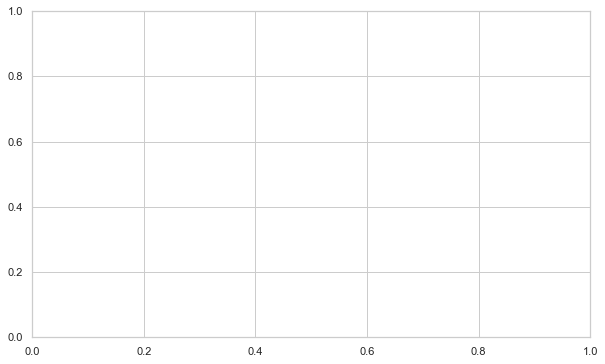

In [37]:
plt.figure(figsize = (10,6))
plt.plot(range(1,40),error_rate, color ='blue', linestyle = 'dashed', marker = 'o', markerfacecolor = 'red',markersize = 8)
plt.title('Error rate vs K-value')
plt.xlabel('k')
plt.ylabel('Error Rate')

# **PERFORMING DECISION TREE ALGORITHM**

In [38]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
dtree_pred = dtree.predict(X_test)

In [39]:
print(confusion_matrix(y_test, dtree_pred))
print('\n')
print(classification_report(y_test, dtree_pred))

[[84890  8472]
 [ 6848  1269]]


              precision    recall  f1-score   support

           0       0.93      0.91      0.92     93362
           1       0.13      0.16      0.14      8117

    accuracy                           0.85    101479
   macro avg       0.53      0.53      0.53    101479
weighted avg       0.86      0.85      0.86    101479



# **PERFORMING RANDOM FOREST ALGORITHM**

In [40]:
rfc = RandomForestClassifier(n_estimators = 200)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)

In [41]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

[[93354     8]
 [ 8102    15]]


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     93362
           1       0.65      0.00      0.00      8117

    accuracy                           0.92    101479
   macro avg       0.79      0.50      0.48    101479
weighted avg       0.90      0.92      0.88    101479



# **PERFORMING SUPPORT VECTOR MACHINE ALGORITHM**

In [42]:
model = SVC()
model.fit(X_train, y_train)
svm_pred = mode.predict(X_test)

NameError: name 'mode' is not defined

In [ ]:
print(confusion_matrix(y_test, rfc_pred))
print('\n')
print(classification_report(y_test, rfc_pred))

# **PERFORMING K MEANS CLUSTERING ALGORITHM**

In [ ]:
# plt.scatter(df[0][:,0], df[0][:,1])

In [ ]:
# kmeans = KMeans(n_clusters = 4)
# kmeans.fit(df[0])
# kmeans.cluster_centers_

In [ ]:
# fig, (ax1, ax2) = plt.subplots(1,2 , sharey =True, figsize = (10,6))

# ax1.set_title('K Means')
# ax.scatter(df[0][:,0],data[0][:,1], c=kmeans.labels_)

# ax1.set_title('K Means')
# ax.scatter(df[0][:,0],data[0][:,1], c=df[1])

# **PERFORMING LOGISTIC REGRESSION ALGORITHM**

In [ ]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)
log_pred = logmodel.predict(X_test)

In [ ]:
print(confusion_matrix(y_test, log_pred))
print('\n')
print(classification_report(y_test, log_pred))

# **PERFORMING LOGISTIC REGRESSION ALGORITHM**

In [ ]:
lm = LinearRegression()
lm.fit(X_train, y_train)
print(lm.intercept_)

In [ ]:
lm.coef_

In [ ]:
X_train.columns

In [ ]:
pd.DataFrame(lm.coef_, X.columns, columns = ['Coeff'])